# 딥러닝 구조 연습4-이미지

* 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 

## 라이브러리 로드

In [1]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape


((60000, 28, 28), (60000,))

In [4]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [5]:
train_images.ndim

3

In [6]:
train_labels # 정수 라벨 인코딩이 진행된 상태

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
import numpy as np

np.unique(train_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [8]:
np.unique(test_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

## 데이터 준비

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
# 데이터 전처리까지 진행
train_scaled = train_images/255.0   # 0~1 사이의 수로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) 


In [11]:
train_scaled.shape, train_labels.shape

((60000, 784), (60000,))

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
test_labels.shape

(10000, 10)

In [17]:
test_images.shape

(10000, 28, 28)

## 딥러닝 구성하기

In [18]:
# 훈련데이터 (전처리 완료상태), 라벨(원핫인코딩이 적용된 상태)

def model_fn():
    model = Sequential()
    model.add(Flatten(input_shape = (784,))) #reshape대신 사용가능
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax')) # 클래스가 10, 다중분류이기 때문에 softmax
    return model


model = model_fn()
model.summary()

NameError: name 'Flatten' is not defined

## 딥러닝 설정하기

In [ ]:
#손실함수
#옵티마이저:경사하강법 종류
#평가방법

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy') 


## 모델 최적화 설정

* 콜백: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* ModelCheckpoint(): 최상의 검증 점수를 만드는 그 때 당시의 가중치와 모델 구조를 저장
* EarlyStopping():검증 점수가 제일 낮을 때, 학습을 중단하여 과적합이 시작되기 전에 훈련을 미리 중지(자원 절약)




In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ## 코랩을 사용할 때
# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장
#label이 원-핫인코딩이 적용되어 있기 때문에 categorical_crossentropy를 적용해야함


checkpoint_cb = ModelCheckpoint(filepath=modelpath,save_best_only=True)

#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.



In [ ]:
from tensorflow.keras.layers import Flatten,Dropout

## 딥러닝 훈련하기

In [ ]:
# 128개 샘플씩 미니 배치로 훈련 데이터 다섯 번 반복(batch_size=128)

history = model.fit(train_scaled, train_labels, epochs=100, verbose=1,
                    validation_split=0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    batch_size = 128)




In [ ]:

# 몇 번째 에포크에서 훈련이 중지 되었는지..
early_stopping_cb.stopped_epoch


14

## 평가하기

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_scaled = test_images/255.0   # 0~1 사이의 수로 정규화
test_scaled = test_scaled.reshape(-1,784)

model.evaluate(test_scaled,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9746


[0.08912145346403122, 0.9746000170707703]

## 시각화하기

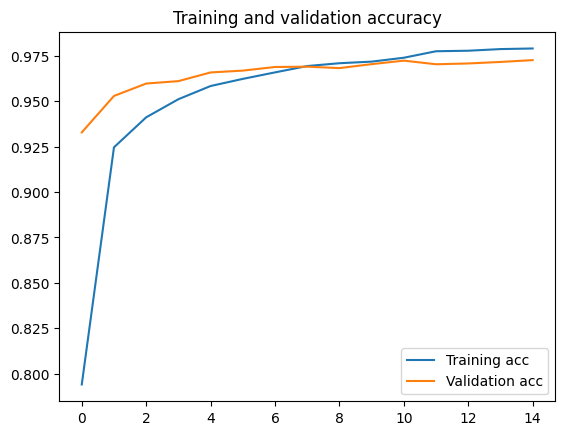

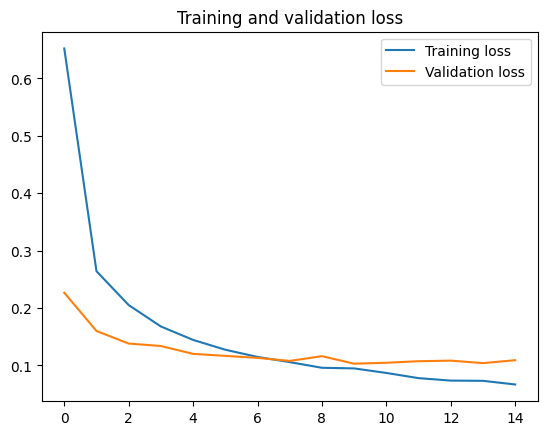

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 전체 코드

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten,Dropout


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_scaled = train_images/255.0   # 0~1 사이의 수로 정규화
train_scaled = train_scaled.reshape(-1, 28*28) 

test_scaled = test_images/255.0   # 0~1 사이의 수로 정규화
test_scaled = test_scaled.reshape(-1, 28*28) 

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model = Sequential()
model.add(Flatten(input_shape = (784,)))    #reshape대신 사용가능
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) # 클래스가 10, 다중분류이기 때문에 softmax

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy') 


from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

checkpoint_cb = ModelCheckpoint(filepath=modelpath,save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(train_scaled, train_labels, epochs=100, verbose=1,
                    validation_split=0.3,
                    callbacks=[checkpoint_cb, early_stopping_cb],
                    batch_size = 128)


Epoch 1/100
329/329 [==============================] - 2s 5ms/step - loss: 0.6351 - accuracy: 0.8060 - val_loss: 0.2129 - val_accuracy: 0.9365
Epoch 2/100
329/329 [==============================] - 1s 4ms/step - loss: 0.2608 - accuracy: 0.9245 - val_loss: 0.1545 - val_accuracy: 0.9545
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1923 - accuracy: 0.9438 - val_loss: 0.1355 - val_accuracy: 0.9601
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1622 - accuracy: 0.9536 - val_loss: 0.1301 - val_accuracy: 0.9608
Epoch 5/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1380 - accuracy: 0.9600 - val_loss: 0.1166 - val_accuracy: 0.9659
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1259 - accuracy: 0.9631 - val_loss: 0.1210 - val_accuracy: 0.9646
Epoch 7/100
329/329 [==============================] - 1s 4ms/step - loss: 0.1117 - accuracy: 0.9671 - val_loss: 0.1093 - val_accuracy: 0.9677

## 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_scaled, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9762


---

## 진짜 내 손글씨 판단하기

* 28x28 픽셀 그림판 만들기 (가로 세로 비율 유지 체크 해제)
* 브러시로 숫자 쓰기
* 저장하기(png형태)

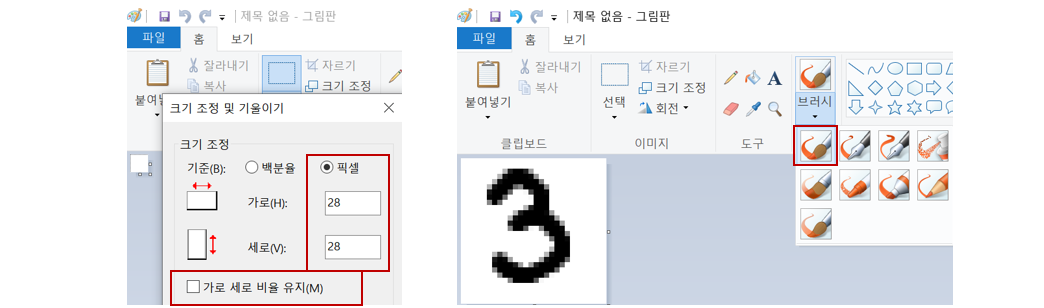

In [ ]:
from PIL import Image
Image.open("./image/3.png",)

In [ ]:
## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

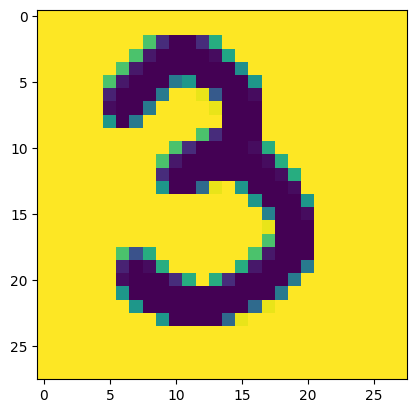

In [ ]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/3.png").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))


# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


In [ ]:
test_data

array([[-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        ,  0.28235294,
         0.8745098 ,  1.        ,  1.        ,  0.8

In [ ]:
# 모델을 다시 읽어서 예측을 해보자

from tensorflow.keras.models import load_model
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 

result = model.predict(test_data)

1/1 [==============================] - 0s 71ms/step


In [ ]:
result

array([[8.3771972e-18, 3.2297723e-10, 1.6087990e-09, 1.0000000e+00,
        2.6727284e-17, 1.2164600e-09, 2.8961343e-16, 2.5548086e-14,
        1.7739928e-11, 5.7582784e-12]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(result[0])

3

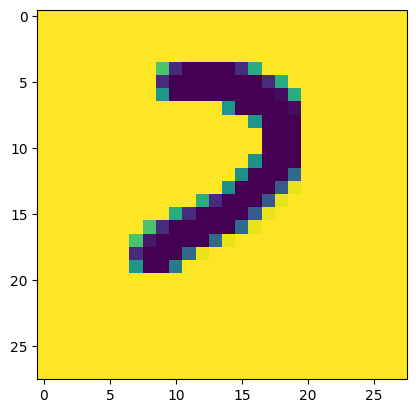

In [ ]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/7.png").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


In [ ]:
np.argmax(model.predict(test_data))

1/1 [==============================] - 0s 18ms/step


2